In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter

In [3]:

import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [5]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [6]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [7]:
#default theme
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)


In [8]:
#warning hadle
warnings.filterwarnings("ignore")

print("Libraries imported")

Libraries imported


In [9]:
# In[4]:


df = pd.read_csv("C:/Users/HP/Desktop/loan prediction/test_Y3wMUE5_7gLdaTN.csv")

In [10]:

df.shape

(367, 12)

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [14]:
df['Credit_History'] = df['Credit_History'].astype('O')
df.describe(include='O')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
count,367,356,367,357,367,344,338.0,367
unique,367,2,2,4,2,2,2.0,3
top,LP001015,Male,Yes,0,Graduate,No,1.0,Urban
freq,1,286,233,200,283,307,279.0,140


In [15]:
df.duplicated().any()

False

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status']);

print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))

# We can consider it as imbalanced data, but for now i will not

In [ ]:
print(df.columns)

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status'])

The percentage of Y class : 0.69
The percentage of N class : 0.31


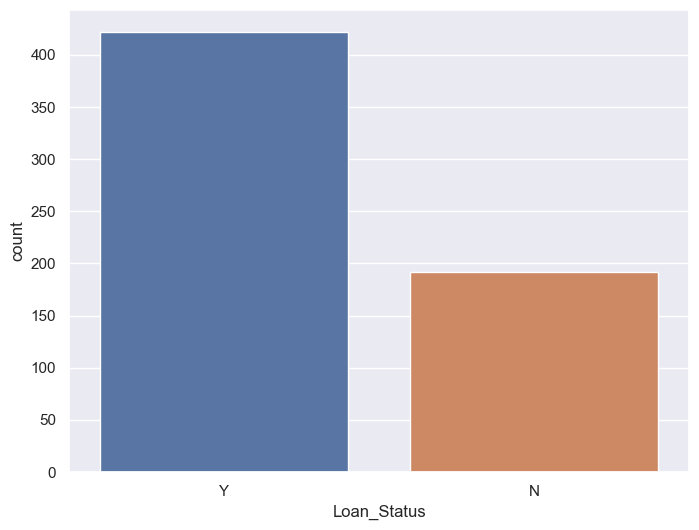

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("C:/Users/HP/Desktop/loan prediction/train_u6lujuX_CVtuZ9i.csv")

plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status'])

print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))


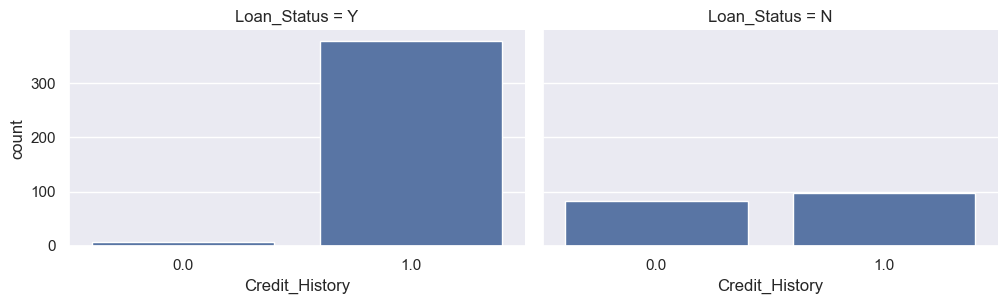

In [17]:
df.head(1)


# In[28]:


grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

In [20]:

print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [19]:
print(pd.crosstab(df['Credit_History'],df['Loan_Status']))

df_history_Y = df[df['Credit_History'] == 1]
df_history_N = df[df['Credit_History'] == 0]

perc_df_self_Y = df_history_Y['Loan_Status'].value_counts()['Y']/len(df_history_Y)
perc_df_self_N = df_history_N['Loan_Status'].value_counts()['Y']/len(df_history_N)

print('\n')

print('Percentage loans with Credit_History Y: %.3f' %perc_df_self_Y)
print('Percentage loans with Credit_History N: %.3f' %perc_df_self_N)


Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


Percentage loans with Credit_History Y: 0.796
Percentage loans with Credit_History N: 0.079


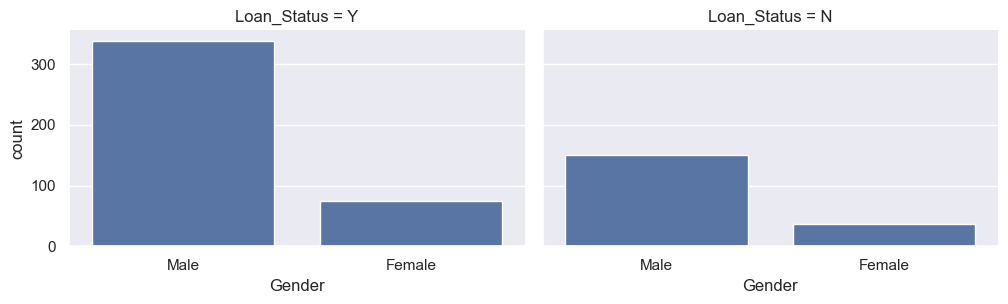

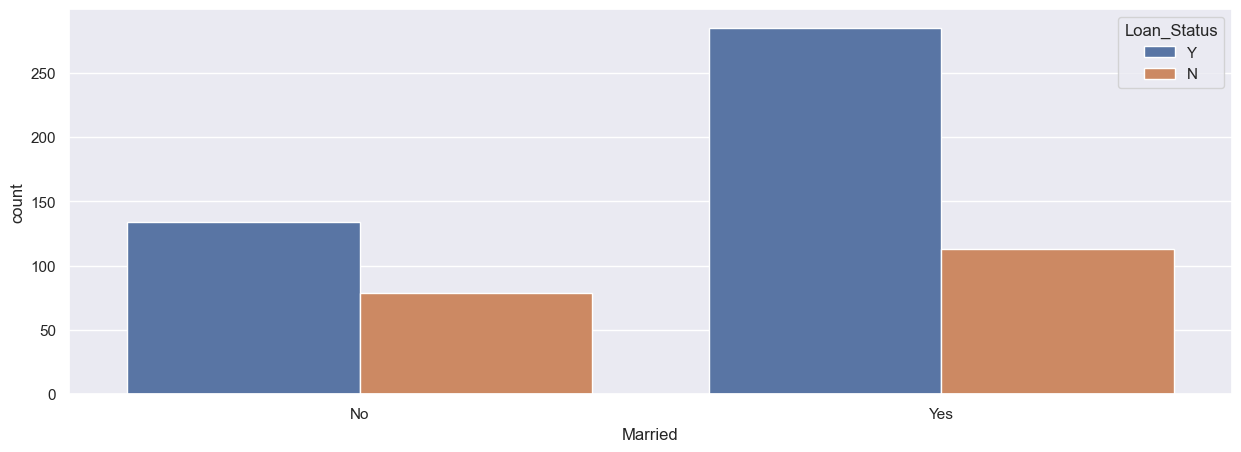

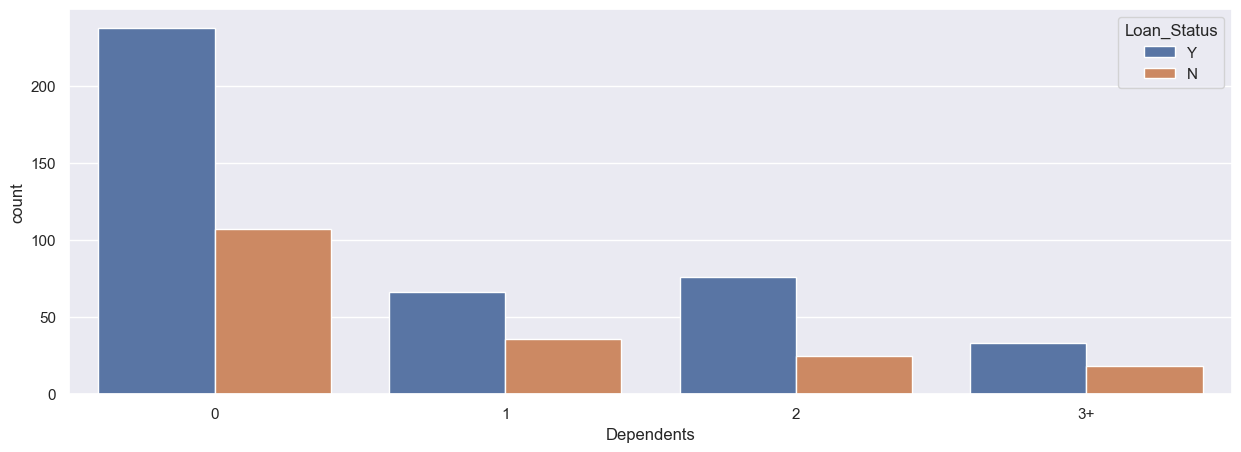

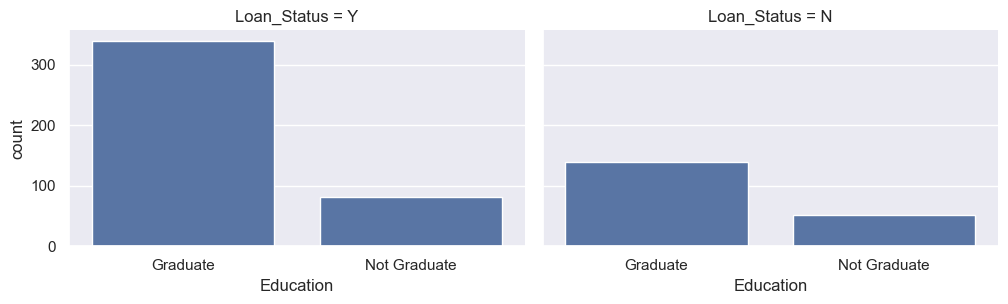

In [21]:

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender');


# In[31]:


# Married
plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=df);


# In[32]:


# Dependents

plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=df);


# In[33]:


# Education

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education');


In [22]:

df_graduated = df[df['Education'] == 'Graduate']
df_not_graduated = df[df['Education'] != 'Graduate']

print('Graduate')
df_graduated.head()



Graduate


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [23]:
print('Not graduate')
df_not_graduated.head()



Not graduate


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N


In [24]:

n_loans_gr = len(df_graduated[df_graduated['Loan_Status'] == 'Y'])
#n_loans_gr = df_graduated['Loan_Status'].value_counts()[0]
length_gr =len(df_graduated)
perc_df_graduated_Y = n_loans_gr/length_gr

n_loans_not_gr = len(df_not_graduated[df_not_graduated['Loan_Status'] == 'Y'])
#n_loans_gr = df_graduated['Loan_Status'].value_counts()[0]
length_not_gr =len(df_not_graduated)
perc_df_not_graduated_Y = n_loans_not_gr/length_not_gr

print('Percentage loans for NOT graduated: %.2f' % perc_df_not_graduated_Y)

print('Percentage loans for graduated: %.2f' % perc_df_graduated_Y)

Percentage loans for NOT graduated: 0.61
Percentage loans for graduated: 0.71


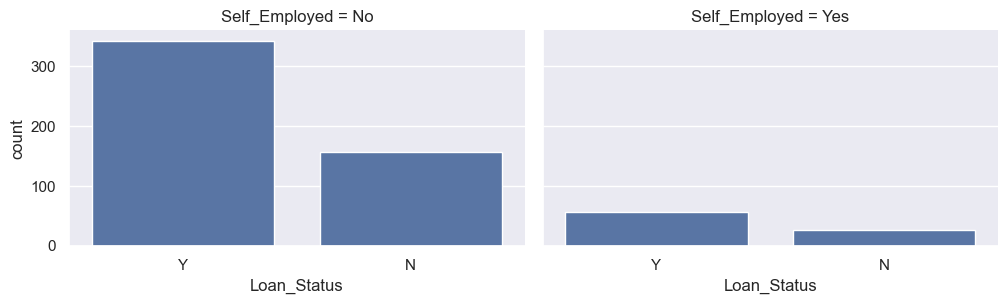

In [25]:
# Self_Employed

grid = sns.FacetGrid(df,col='Self_Employed', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Loan_Status');

# No pattern (same as Education)



In [26]:
df_self_employed_Y = df[df['Self_Employed'] == 'Yes']
df_self_employed_N = df[df['Self_Employed'] == 'No']

n_loans_self_y = df_self_employed_Y['Loan_Status'].value_counts()[0]
length_self_y =len(df_self_employed_Y)
perc_df_self_Y = n_loans_self_y/length_self_y

n_loans_self_n = df_self_employed_N['Loan_Status'].value_counts()[0]
length_self_n =len(df_self_employed_N)
perc_df_self_N = n_loans_self_n/length_self_n

print('Percentage loans for self employed: %.2f' % perc_df_self_Y)

print('Percentage loans for not self employed: %.2f' % perc_df_self_N)


Percentage loans for self employed: 0.68
Percentage loans for not self employed: 0.69


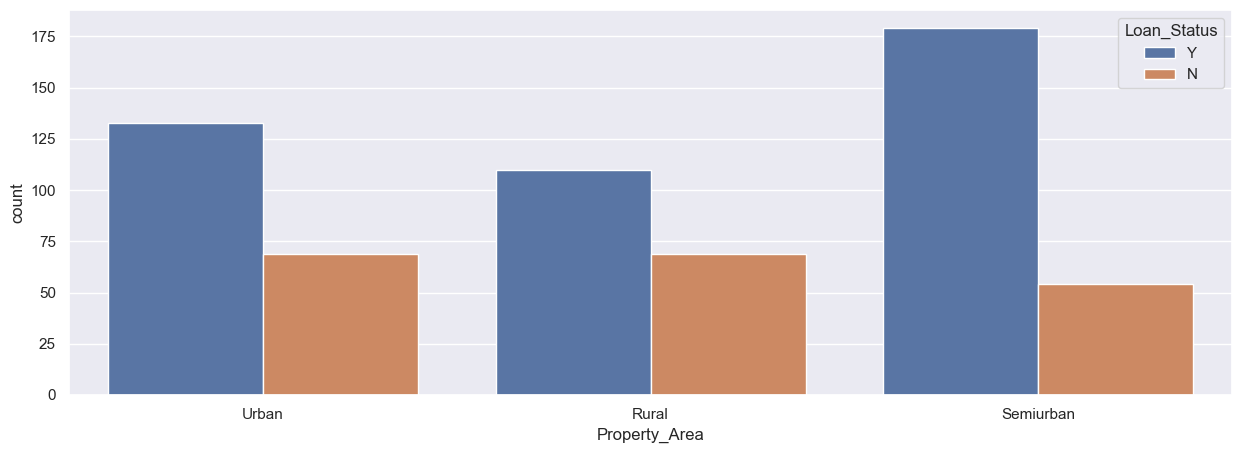

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df);

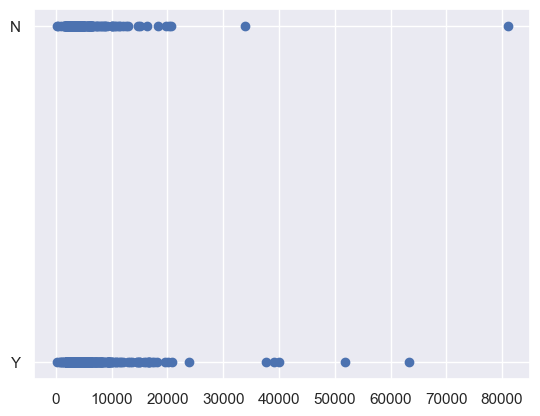

In [28]:
# ApplicantIncome

plt.scatter(df['ApplicantIncome'], df['Loan_Status']);

# No pattern


In [29]:
# The numerical data

df.groupby('Loan_Status').median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,129.0,360.0,1.0
Y,3812.5,1239.5,126.0,360.0,1.0


In [31]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
# We will separate the numerical columns from the categorical

cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])
        

cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [33]:
cat_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [34]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [35]:
cat_data.isnull().sum().any() #cat_data missing values?

True

In [36]:
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() # No more missing data

False

In [38]:
num_data.isnull().sum().any() # num_data missing data?

False

In [39]:
# Numerical data
# Fill every missing value with their previous value in the same column.

num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any() # no more missing data

False

In [40]:

from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [41]:
# Transform the target column

target_values = {'Y': 0 , 'N' : 1}

# Save 'Loan_Status' column in 'target'
target = cat_data['Loan_Status']

#Remove 'Loan_Status' column from cat_data
cat_data.drop('Loan_Status', axis=1, inplace=True)

# Map 'target' according to 'target_values' 
target = target.map(target_values)


In [42]:
# Transform the remaining columns of cat_data

for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
target.head()



0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

In [43]:
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2


In [80]:

# Create new Pandas object 
df = pd.concat([cat_data, num_data, target], axis=1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,0
1,1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,1
2,2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,0
3,3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,0
4,4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,0


In [81]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

# Almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))


X_train shape (491, 12)
y_train shape (491,)
X_test shape (123, 12)
y_test shape (123,)

ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


In [82]:

# We will use 4 different models for training

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}


In [83]:
# Loss

from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' 
              % (pre, rec, f1, loss, acc))

In [50]:

# Train data

def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*30)

train_eval_train(models, X_train, y_train)

# We can see that best model is LogisticRegression at least for now, SVC is just 
# memorizing the data so it is overfitting.


LogisticRegression :
  pre: 0.857
  rec: 0.390
  f1: 0.536
  loss: 7.316
  acc: 0.788
------------------------------
KNeighborsClassifier :
  pre: 0.700
  rec: 0.364
  f1: 0.479
  loss: 8.582
  acc: 0.752
------------------------------
SVC :
  pre: 1.000
  rec: 0.013
  f1: 0.026
  loss: 10.692
  acc: 0.690
------------------------------
DecisionTreeClassifier :
  pre: 0.870
  rec: 0.435
  f1: 0.580
  loss: 6.823
  acc: 0.802
------------------------------


In [84]:
# Cross validation

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    # We will change X & y to dataframe because we will use iloc (iloc don't work on numpy array)
    X = pd.DataFrame(X) 
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train]) 
            y_pred = model.predict(X.iloc[test]) 
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] because we don't want to show the name of the column
        print('-'*30)
        
train_eval_cross(models, X_train, y_train, skf)

# SVC is just memorizing the data, and you can see 
# that here DecisionTreeClassifier is better than LogisticRegression

LogisticRegression :
 pre     0.818925
 rec     0.395417
 f1      0.527801
 loss    7.457577
 acc     0.784082
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.333175
 rec      0.169167
 f1       0.217315
 loss    13.010638
 acc      0.623306
Name: 0, dtype: float64
------------------------------
SVC :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    11.043955
 acc      0.680245
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.856749
 rec     0.435833
 f1      0.564139
 loss    6.823187
 acc     0.802449
Name: 0, dtype: float64
------------------------------


In [52]:
# Some explanation about Logistic Regression

x = []
idx = [' pre', ' rec', ' f1', ' loss', ' acc']

# We will use one model
log = LogisticRegression()

for train, test in skf.split(X_train, y_train):
    log.fit(X_train.iloc[train], y_train.iloc[train])
    ls = loss(y_train.iloc[test], log.predict(X_train.iloc[test]), retu=True)
    x.append(ls)
    
# Thats what we get
pd.DataFrame(x, columns=idx)

# (column 0 represent the precision_score of the 10 folds)
# (row 0 represent the (pre, rec, f1, loss, acc) for the first fold)
# then we should find the mean of every column
# pd.DataFrame(x, columns=idx).mean(axis=0)

,pre,rec,f1,loss,acc
0,0.875000,0.437500,0.583333,6.907771,0.800000
1,0.666667,0.266667,0.380952,9.163381,0.734694
2,0.875000,0.466667,0.608696,6.343873,0.816327
3,0.428571,0.200000,0.272727,11.278033,0.673469
4,1.000000,0.466667,0.636364,5.638984,0.836735
5,0.777778,0.466667,0.583333,7.048763,0.795918
6,0.857143,0.400000,0.545455,7.048746,0.795918
7,0.909091,0.625000,0.740741,4.934127,0.857143
8,0.800000,0.250000,0.380952,9.163365,0.734694
9,1.000000,0.375000,0.545455,7.048730,0.795918


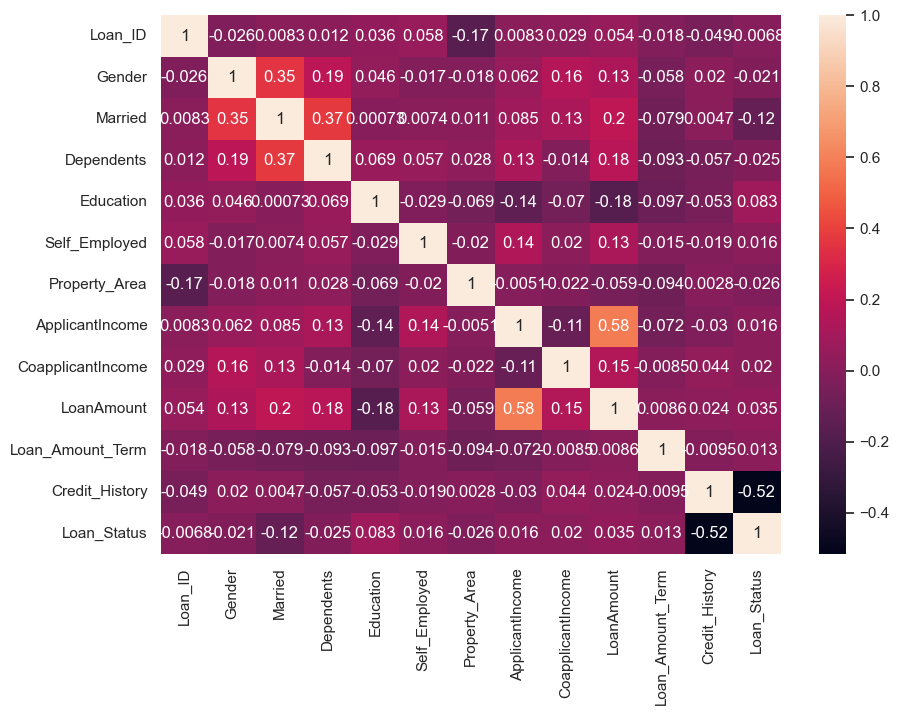

In [85]:

# In[65]:


# Credit_History is the best.

data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);



In [88]:
X_train['new_col'] = X_train['CoapplicantIncome'] / X_train['ApplicantIncome']  
X_train['new_col_2'] = X_train['LoanAmount'] * X_train['Loan_Amount_Term']



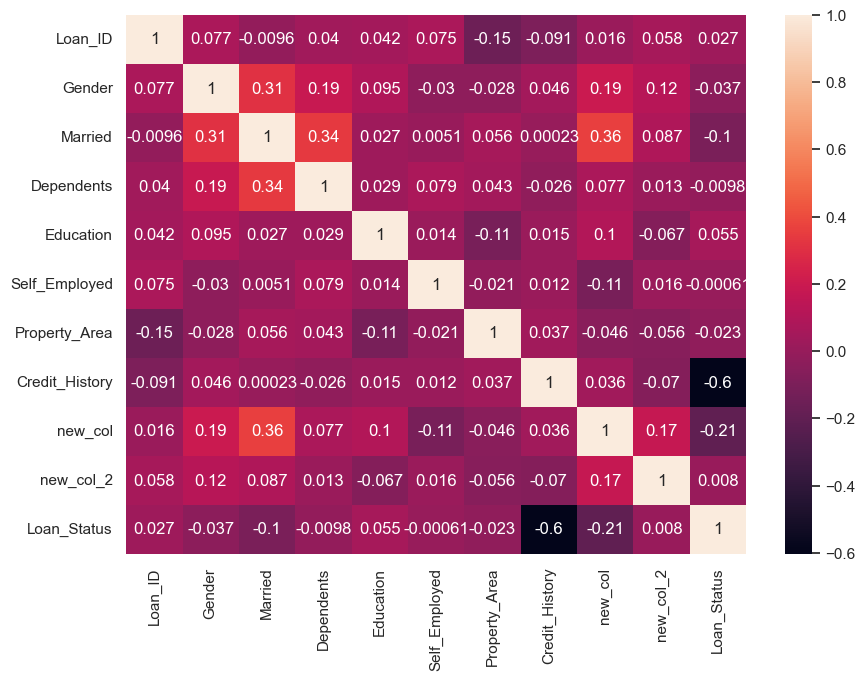

In [74]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

# new_col 0.03 , new_col_2, 0.047
# Not that much , but that will help us reduce the number of features

In [90]:
# new_col 0.03 , new_col_2, 0.047
# Not that much , but that will help us reduce the number of features


# In[68]:


X_train.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

In [92]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre      0.190000
 rec      0.045417
 f1       0.072632
 loss    10.695751
 acc      0.690327
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.282190
 rec      0.149583
 f1       0.193264
 loss    13.580184
 acc      0.606816
Name: 0, dtype: float64
------------------------------
SVC :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.832488
 acc      0.686367
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.856749
 rec     0.435833
 f1      0.564139
 loss    6.823187
 acc     0.802449
Name: 0, dtype: float64
------------------------------


************************

415    1
414    1
38     1
563    1
307    1
      ..
108    1
384    1
254    1
330    1
240    1
Name: Loan_ID, Length: 491, dtype: int64
------------------------------------------------
1    398
0     93
Name: Gender, dtype: int64
------------------------------------------------
1    315
0    176
Name: Married, dtype: int64
------------------------------------------------
0    292
2     85
1     78
3     36
Name: Dependents, dtype: int64
------------------------------------------------
0    382
1    109
Name: Education, dtype: int64
------------------------------------------------
0    428
1     63
Name: Self_Employed, dtype: int64
------------------------------------------------
1    179
2    170
0    142
Name: Property_Area, dtype: int64
------------------------------------------------
1.0    414
0.0     77
Name: Credit_History, dtype: int64
------------------------------------------------
0.000000    222
0.414374      1
0.441544      1
0.556065      1
0.

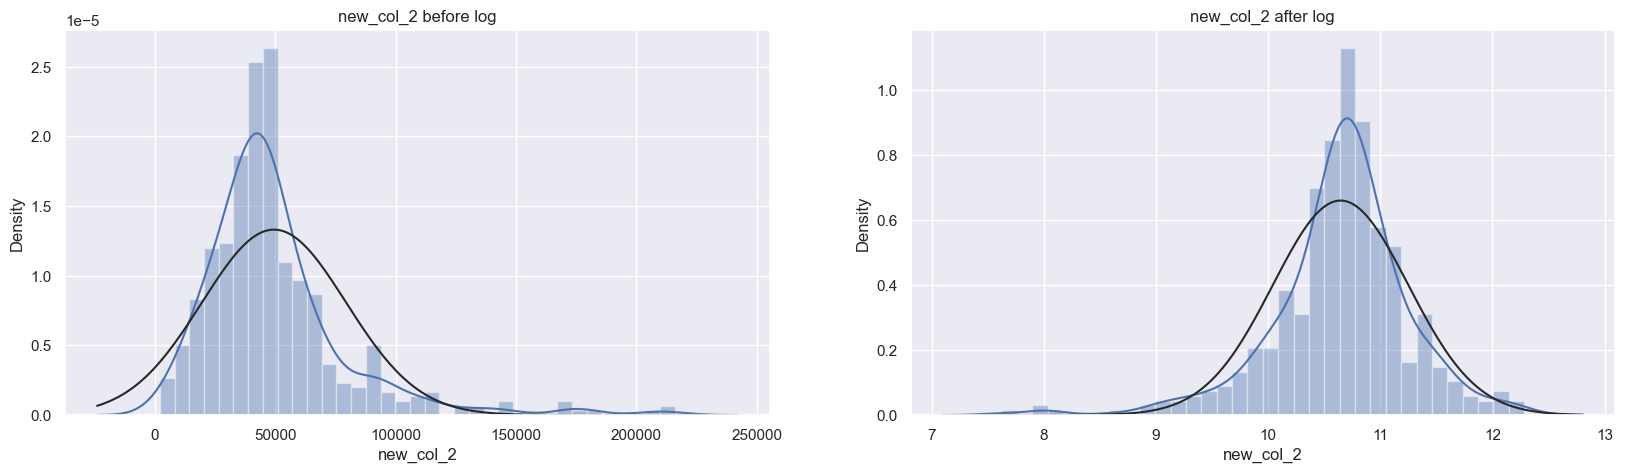

In [93]:
# In[70]:


#print(X_train.shape)
#print(X_train.shape[0]) # Rows
#print(X_train.shape[1]) # Columns

print('************************\n')

for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')


# In[71]:


# new_col_2

# We can see we got right_skewed
# We can solve this problem with very simple statistical technique , by taking the logarithm of all the values
# because when data is normally distributed that will help improving our model

from scipy.stats import norm

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(X_train['new_col_2'], ax=ax[0], fit=norm)
ax[0].set_title('new_col_2 before log')

X_train['new_col_2'] = np.log(X_train['new_col_2'])  # logarithm of all the values

sns.distplot(X_train['new_col_2'], ax=ax[1], fit=norm)
ax[1].set_title('new_col_2 after log');


In [94]:
# Now we will evaluate our models, and i will do that continuously ,so i don't need to 
# mention that every time

train_eval_cross(models, X_train, y_train, skf)


LogisticRegression :
 pre     0.843415
 rec     0.442500
 f1      0.568336
 loss    6.823188
 acc     0.802449
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.314262
 rec      0.143750
 f1       0.188048
 loss    13.153020
 acc      0.619184
Name: 0, dtype: float64
------------------------------
SVC :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.832488
 acc      0.686367
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.856749
 rec     0.435833
 f1      0.564139
 loss    6.823187
 acc     0.802449
Name: 0, dtype: float64
------------------------------


In [95]:


# new_col

# Most of our data is 0 , so we will try to change other values to 1

print('before:')
print(X_train['new_col'].value_counts())

X_train['new_col'] = [x if x==0 else 1 for x in X_train['new_col']]
print('-'*50)
print('\nafter:')
print(X_train['new_col'].value_counts())

before:
0.000000    222
0.414374      1
0.441544      1
0.556065      1
0.985459      1
           ... 
0.750075      1
0.964755      1
0.743616      1
5.365854      1
0.859254      1
Name: new_col, Length: 270, dtype: int64
--------------------------------------------------

after:
1.0    269
0.0    222
Name: new_col, dtype: int64


In [96]:
train_eval_cross(models, X_train, y_train, skf)

# We are improving our models as we go

LogisticRegression :
 pre     0.856749
 rec     0.435833
 f1      0.564139
 loss    6.823187
 acc     0.802449
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.294295
 rec      0.150833
 f1       0.193130
 loss    13.153021
 acc      0.619184
Name: 0, dtype: float64
------------------------------
SVC :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.832488
 acc      0.686367
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.856749
 rec     0.435833
 f1      0.564139
 loss    6.823187
 acc     0.802449
Name: 0, dtype: float64
------------------------------


415    1
414    1
38     1
563    1
307    1
      ..
108    1
384    1
254    1
330    1
240    1
Name: Loan_ID, Length: 491, dtype: int64
------------------------------------------------
1    398
0     93
Name: Gender, dtype: int64
------------------------------------------------
1    315
0    176
Name: Married, dtype: int64
------------------------------------------------
0    292
2     85
1     78
3     36
Name: Dependents, dtype: int64
------------------------------------------------
0    382
1    109
Name: Education, dtype: int64
------------------------------------------------
0    428
1     63
Name: Self_Employed, dtype: int64
------------------------------------------------
1    179
2    170
0    142
Name: Property_Area, dtype: int64
------------------------------------------------
1.0    414
0.0     77
Name: Credit_History, dtype: int64
------------------------------------------------
1.0    269
0.0    222
Name: new_col, dtype: int64
------------------------------------------

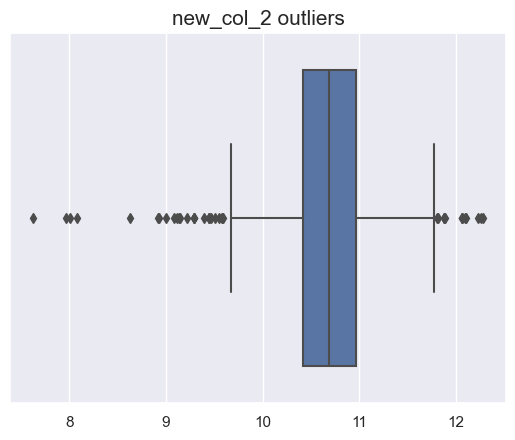

In [97]:
# In[75]:


for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')
    


# In[76]:


# Outliers: we will use boxplot to detect them 

sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 outliers', fontsize=15);
plt.xlabel('');


In [98]:
threshold = 0.1  # This number is a hyper parameter, by reducing it, more points are removed.
                 # You can just try different values, the deafult value is (1.5) it works good for most cases.
                 # Be careful, you don't want to try a small number because you may loss some important information from data.
                 # That's why I was surprised when 0.1 gived me the best result
            
new_col_2_out = X_train['new_col_2']

q25, q75 = np.percentile(new_col_2_out, 25), np.percentile(new_col_2_out, 75) # Q25, Q75

print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in new_col_2_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = pd.concat([X_train, y_train], axis=1)
print('\nlen X_train before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['new_col_2'] > upper) | (data_outliers['new_col_2'] < lower)].index)

print('len X_train before dropping the outliers', len(data_outliers))

Quartile 25: 10.416008100285975 , Quartile 75: 10.961277846683982
iqr: 0.5452697463980076
Cut Off: 0.05452697463980077
Lower: 10.361481125646174
Upper: 11.015804821323783
Nubers of Outliers: 218
outliers:[9.980448593672257, 10.31692083029347, 10.09823162932864, 11.056588026488308, 11.502875129116727, 12.092679958175083, 11.427367576608582, 11.62589694362939, 10.083305979111964, 11.473352689850405, 11.184421397998193, 9.692766521220475, 10.14878390849147, 10.190169124654325, 10.268130666124037, 10.268130666124037, 10.31692083029347, 8.930626469173578, 11.184421397998193, 10.16277015046621, 10.268130666124037, 11.153962190513484, 9.878169744551839, 7.620705086838262, 11.117212648304742, 11.39143556738252, 11.589886506106357, 11.502875129116727, 11.237962164926222, 10.044987114809828, 9.946547041996576, 9.980448593672257, 9.963641475355875, 11.117212648304742, 11.427367576608582, 11.654425027243928, 11.375041757606843, 11.383272256743357, 12.254862809699606, 11.629107219259637, 7.96554557

In [99]:
X_train = data_outliers.drop('Loan_Status', axis=1)
y_train = data_outliers['Loan_Status']


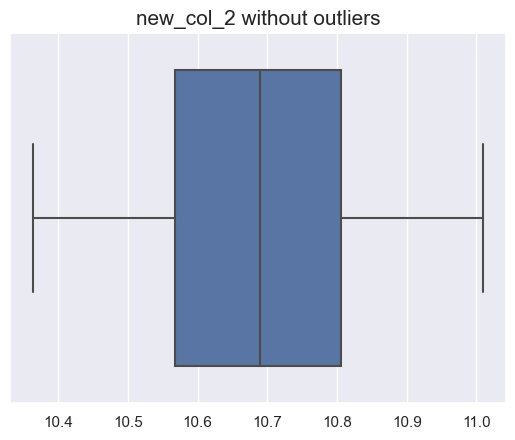

In [100]:
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 without outliers', fontsize=15);
plt.xlabel('');

# good :)

In [101]:
# In[80]:


train_eval_cross(models, X_train, y_train, skf)


LogisticRegression :
 pre     0.884167
 rec     0.535714
 f1      0.654872
 loss    4.929560
 acc     0.857275
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.320238
 rec      0.096429
 f1       0.133117
 loss    10.882520
 acc      0.684921
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.000000
 rec     0.000000
 f1      0.000000
 loss    8.981909
 acc     0.739947
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.884167
 rec     0.535714
 f1      0.654872
 loss    4.929560
 acc     0.857275
Name: 0, dtype: float64
------------------------------


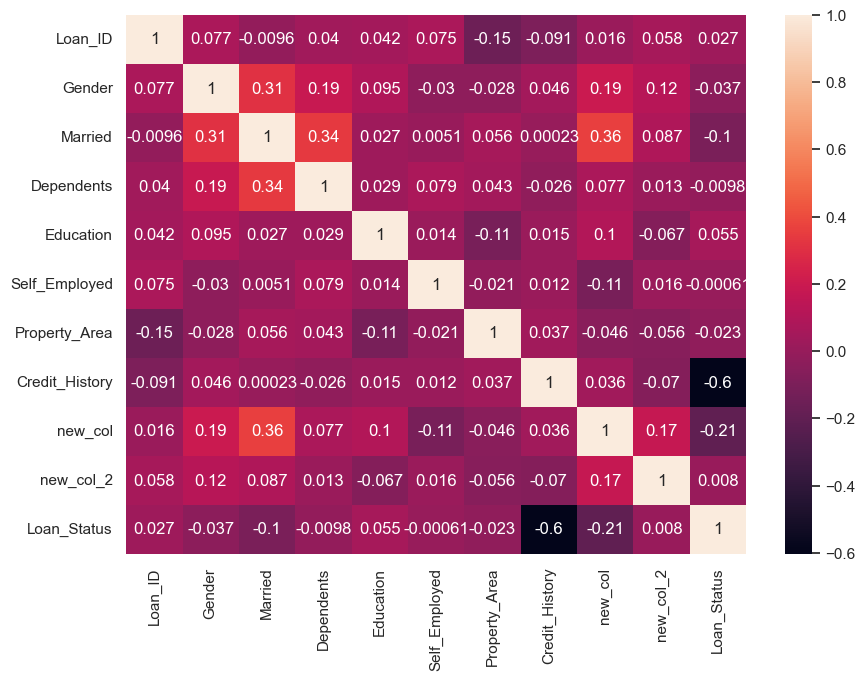

In [102]:
# Self_Employed got really bad corr (-0.00061) , let's try to remove it and see what will happen

data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);


In [104]:
#X_train.drop(['Self_Employed'], axis=1, inplace=True)

train_eval_cross(models, X_train, y_train, skf)

# looks like Self_Employed is not important
# KNeighborsClassifier improved

# droping all the features Except for Credit_History actually improved KNeighborsClassifier and didn't change anything in other models
# so you can try it by you self
# but don't forget to do that on testing data too

#X_train.drop(['Self_Employed','Dependents', 'new_col_2', 'Education', 'Gender', 'Property_Area','Married', 'new_col'], axis=1, inplace=True)




LogisticRegression :
 pre     0.884167
 rec     0.535714
 f1      0.654872
 loss    4.929560
 acc     0.857275
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.320238
 rec      0.096429
 f1       0.133117
 loss    10.882520
 acc      0.684921
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.000000
 rec     0.000000
 f1      0.000000
 loss    8.981909
 acc     0.739947
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.884167
 rec     0.535714
 f1      0.654872
 loss    4.929560
 acc     0.857275
Name: 0, dtype: float64
------------------------------


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
182,182,1,1,0,0,0,1,4600.0,0.0,73.0,180.0,1.0
440,440,1,0,0,0,0,1,3660.0,5064.0,187.0,360.0,1.0
276,276,1,1,0,0,0,1,3993.0,3274.0,207.0,360.0,1.0
533,533,1,0,1,0,0,1,11250.0,0.0,196.0,360.0,1.0
504,504,1,1,0,1,0,1,3814.0,1483.0,124.0,300.0,1.0


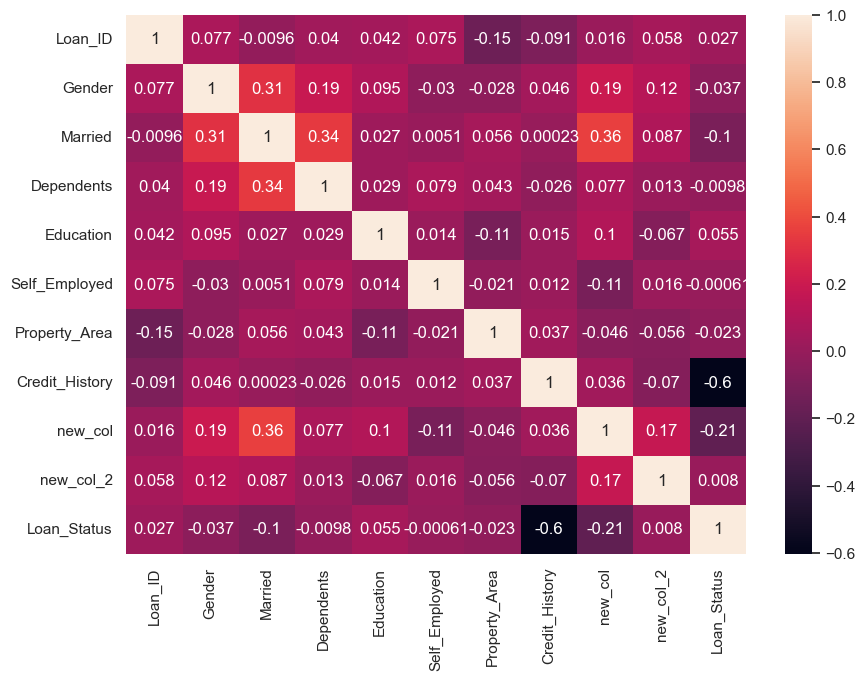

In [107]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);
X_test.head()

In [108]:
X_test_new = X_test.copy()


# In[86]:


x = []

X_test_new['new_col'] = X_test_new['CoapplicantIncome'] / X_test_new['ApplicantIncome']  
X_test_new['new_col_2'] = X_test_new['LoanAmount'] * X_test_new['Loan_Amount_Term']
X_test_new.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

X_test_new['new_col_2'] = np.log(X_test_new['new_col_2'])

X_test_new['new_col'] = [x if x==0 else 1 for x in X_test_new['new_col']]

In [109]:
X_test_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History,new_col,new_col_2
182,182,1,1,0,0,0,1,1.0,0.0,9.483416
440,440,1,0,0,0,0,1,1.0,1.0,11.117213
276,276,1,1,0,0,0,1,1.0,1.0,11.218823
533,533,1,0,1,0,0,1,1.0,0.0,11.164219
504,504,1,1,0,1,0,1,1.0,1.0,10.524064


In [110]:
X_test_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History,new_col,new_col_2
182,182,1,1,0,0,0,1,1.0,0.0,9.483416
440,440,1,0,0,0,0,1,1.0,1.0,11.117213
276,276,1,1,0,0,0,1,1.0,1.0,11.218823
533,533,1,0,1,0,0,1,1.0,0.0,11.164219
504,504,1,1,0,1,0,1,1.0,1.0,10.524064


In [111]:
X_test_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History,new_col,new_col_2
182,182,1,1,0,0,0,1,1.0,0.0,9.483416
440,440,1,0,0,0,0,1,1.0,1.0,11.117213
276,276,1,1,0,0,0,1,1.0,1.0,11.218823
533,533,1,0,1,0,0,1,1.0,0.0,11.164219
504,504,1,1,0,1,0,1,1.0,1.0,10.524064
